In [1]:
#Importing all the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#Reading the Data
data=pd.read_csv('C:\\Users\\mehul\\Downloads\\CPIAUCSL.csv',parse_dates = True)
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE',inplace=True)
data.head(10)

,CPIAUCSL
DATE,
1971-05-01,40.3
1971-06-01,40.5
1971-07-01,40.6
1971-08-01,40.7
1971-09-01,40.8
1971-10-01,40.9
1971-11-01,41.0
1971-12-01,41.1
1972-01-01,41.2


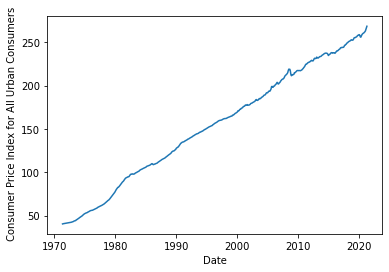

In [3]:
# Plotting the Data to understabd if the data is stationary or non stationary
plt.xlabel('Date')
plt.ylabel(' Consumer Price Index for All Urban Consumers')
plt.plot(data['CPIAUCSL'])

In [4]:
# Checking if the data is stationary or non stationary through the Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
result

#Therefore data is non stationary (#90% chance of non stationary). 
#Hence we need to convert it into stationary data.

(-0.41527512733137106,
 0.9075169684193924,
 15,
 585,
 {'1%': -3.4415777369651717,
  '5%': -2.866493255736561,
  '10%': -2.569407951640003},
 576.233597142739)

In [5]:
#Since the data is non stationary, so convert the data into stationary by using 1st order differencing.
data['First Difference'] = data['CPIAUCSL'] - data['CPIAUCSL'].shift(1)
data = data.dropna()
data

#Checking if the data is stationary or non stationary after 1st order differencing.
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['First Difference'])
result # This shows that the data has now become stationary.

(-5.090704461504026,
 1.4635068227838245e-05,
 14,
 585,
 {'1%': -3.4415777369651717,
  '5%': -2.866493255736561,
  '10%': -2.569407951640003},
 574.573232281917)

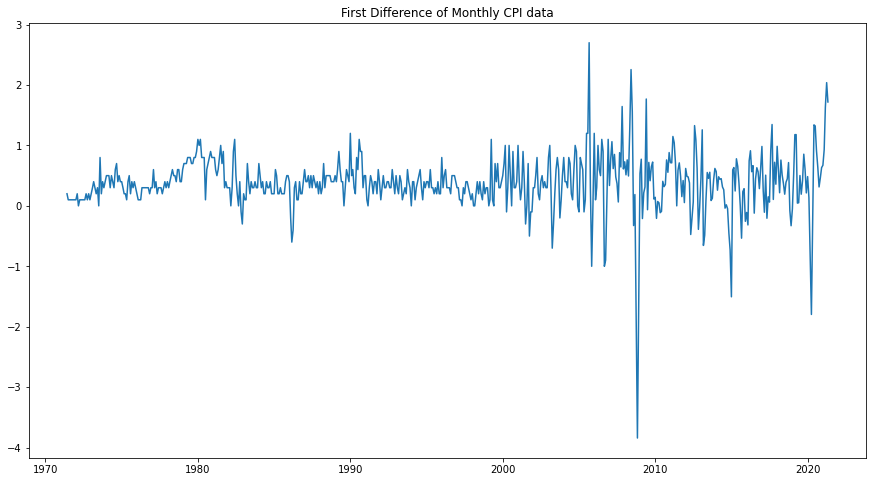

In [6]:
# Analyzing the Stationary Data.
plt.figure(figsize=[15, 8]); # Set dimensions for figure
plt.plot(data['First Difference'])
plt.title("First Difference of Monthly CPI data")
plt.show()

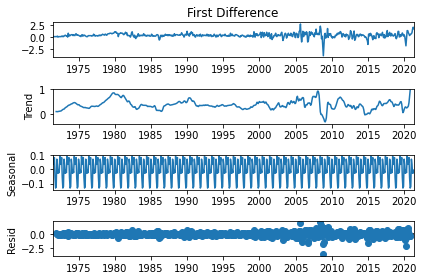

In [7]:
# Decomposing the data to understand if the data has Time Trend, Seasonality or Cyclicity.
from statsmodels.tsa.seasonal import seasonal_decompose
data_dec_additive = seasonal_decompose(data['First Difference'],model='additive')
data_dec_additive.plot()
plt.show() # Only Time Trend is visible.

<Figure size 1080x576 with 0 Axes>

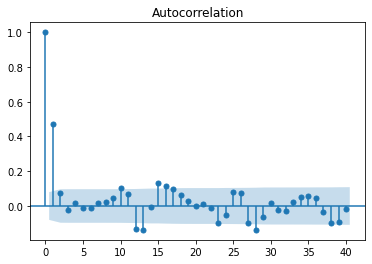

In [8]:
# Plot ACF to understand the MA Component.
plt.figure(figsize=[15, 8]); # Set dimensions for figure
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(data['First Difference'], lags=40)
plt.show()

<Figure size 1080x576 with 0 Axes>

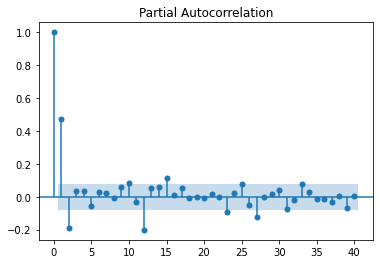

In [9]:
# Plot PACF to understand the AR Component.
plt.figure(figsize=[15, 8]); # Set dimensions for figure
import statsmodels.graphics.tsaplots as sgt
sgt.plot_pacf(data['First Difference'], lags=40)
plt.show()

#The ACF graph has one significant lines in the beginning but the significance spikes quickly decreases to zero
# and at the same time the PACF graph has 3 significant lines. This reflects that we should use AR(3) and MA(1) Model.

## Methodology followed for Prediction Using ARIMA Model:

1.Plot the time series data to understand if it has time trend, seasonality or cyclicity.

2.Use Augmented Dickey Fuller test to check if the data is stationary or not. If the data is non stationary, convert the data into stationary by using 1st order differencing.

3.Plot autocorrelation factor (ACF) and partial autocorrelation factor (PACF) to identify patterns in the above data. The idea is to identify presence of AR and MA components in the residuals.

4.Construct the model and select the best model based on Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) values. 

5.The last step is to use the model to predict the values.

In [10]:
# Import ARIMA Model and train it.
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model_arima = ARIMA(data['CPIAUCSL'], order=(3,1,1))
model_arima_fit = model_arima.fit()

# Summary of the model
print(model_arima_fit.summary())

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               CPIAUCSL   No. Observations:                  600
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -299.562
Date:                Sat, 10 Jul 2021   AIC                            609.125
Time:                        10:00:00   BIC                            631.101
Sample:                    06-01-1971   HQIC                           617.681
                         - 05-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5687      0.017     92.256      0.000       1.535       1.602
ar.L2         -0.7548      0.039    -19.152      0.000      -0.832      -0.678
ar.L3          0.1860      0.028      6.705      0.0

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# Predict using ARIMA Model.
a = '2011-01-01'
b = '2021-05-01'
data['forecast_arima']=model_arima_fit.predict(start=a,end=b)
data = data[['CPIAUCSL','forecast_arima']]
data = data.dropna()
data

,CPIAUCSL,forecast_arima
DATE,,
2011-01-01,221.187,221.103294
2011-02-01,221.898,221.662667
2011-03-01,223.046,222.402987
2011-04-01,224.093,223.801691
2011-05-01,224.806,224.710594
...,...,...
2021-01-01,262.231,262.061604
2021-02-01,263.161,262.723272
2021-03-01,264.793,263.794308


Text(0.5, 1.0, 'Forecasting CPI using Time Series Analysis')

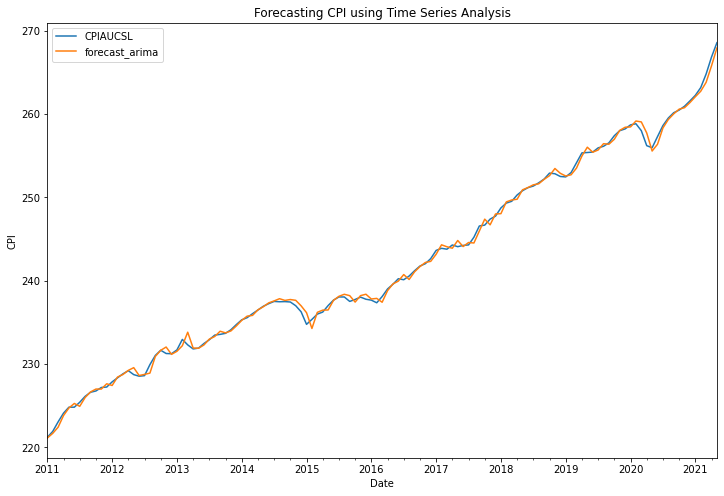

In [12]:
# Analyzing the Prediction.
results = data[['CPIAUCSL','forecast_arima']]
results.plot(figsize=(12,8))
results = results.dropna()
plt.xlabel("Date")
plt.ylabel("CPI")
plt.title("Forecasting CPI using Time Series Analysis") #The Result looks accurate.

In [13]:
# Define a function to check the Accuracy of the Prediction.
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [14]:
forecast_accuracy(data['forecast_arima'], data['CPIAUCSL'])

{'mape': 0.0014497079775644265,
 'me': -0.007620544513561754,
 'mae': 0.35221728486383497,
 'mpe': -1.9905124007776155e-05,
 'rmse': 0.47457736889230234}

<AxesSubplot:xlabel='DATE'>

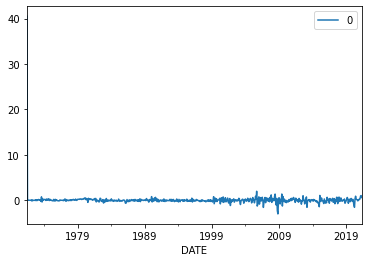

In [15]:
# Line plot of residuals
residuals = pd.DataFrame(model_arima_fit.resid)
residuals.plot()

In [16]:
# summary stats of residuals
print(residuals.describe())

                0
count  600.000000
mean     0.085673
std      1.699767
min     -2.976709
25%     -0.144501
50%      0.024984
75%      0.199484
max     40.500000


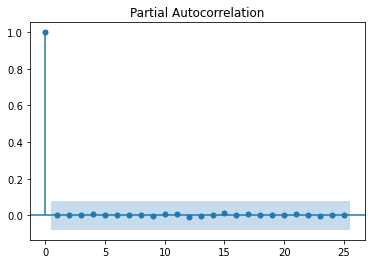

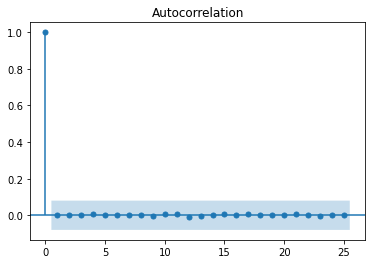

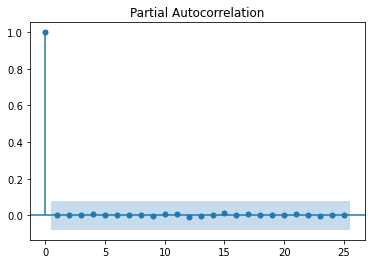

In [17]:
#Understanding if the lags used are proper or do we need to change the AR & MA Component.
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=25)

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(residuals, lags=25)
# Thus from the below figure we can conclude that the lags used are proper

In [18]:
# Checking the 10 latest values of CPI-U.
results.columns = ['CPI-U', 'Forecast']
results.tail(10)

,CPI-U,Forecast
DATE,,
2020-08-01,259.511,259.333567
2020-09-01,260.149,260.008230
2020-10-01,260.462,260.570717
2020-11-01,260.927,260.748730
2020-12-01,261.560,261.360971
2021-01-01,262.231,262.061604
2021-02-01,263.161,262.723272
2021-03-01,264.793,263.794308
2021-04-01,266.832,265.779202


# Thank You...!!